# Exploratory Data Analysis for first look at Crypto Data

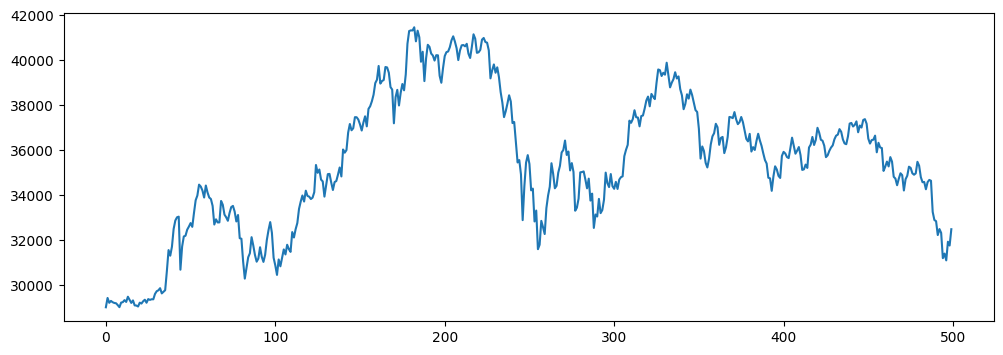

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_parquet("/home/nina/crypto-ml-trading/data/BTCUSDT_1h.parquet")
df["close"].plot(figsize=(12,4))
plt.show()

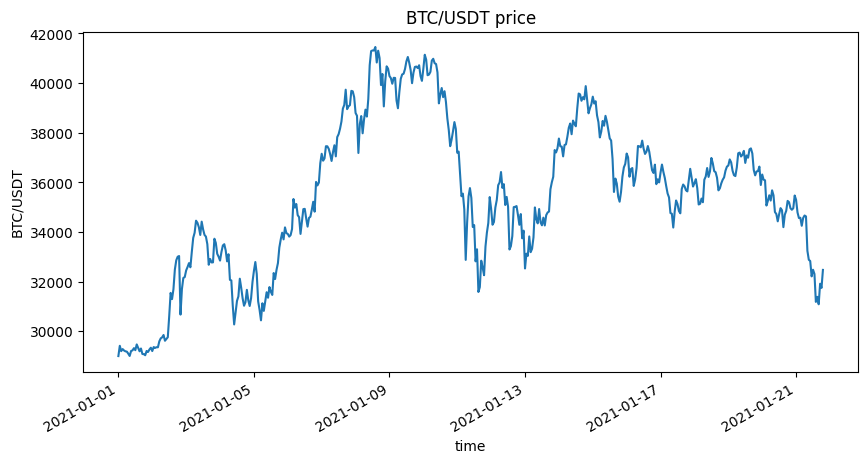

In [10]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df["timestamp"], df["close"])

date_format = mdates.DateFormatter('%Y-%m-%d') #format: YYYY-MM-DD
ax.xaxis.set_major_formatter(date_format)

fig.autofmt_xdate() # rotate date to prevent overlap

ax.set_title("BTC/USDT price")
ax.set_xlabel("time")
ax.set_ylabel("BTC/USDT")

plt.show()